# CODE

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
%matplotlib inline
plt.style.use('fivethirtyeight')

In [3]:
#Reading the Data
df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,Class,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   Class                        1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
#Adding a column of total score in the dataframe
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df.head()

,gender,Class,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [6]:
#Correlation among numeric columns
df.corr()

,math score,reading score,writing score,total score
math score,1.000000,0.817580,0.802642,0.918746
reading score,0.817580,1.000000,0.954598,0.970331
writing score,0.802642,0.954598,1.000000,0.965667
total score,0.918746,0.970331,0.965667,1.000000


This shows the students scoring good in one subject, score good overall (in all the subjects)

Text(0.5, 1.0, 'Covariance Plot')

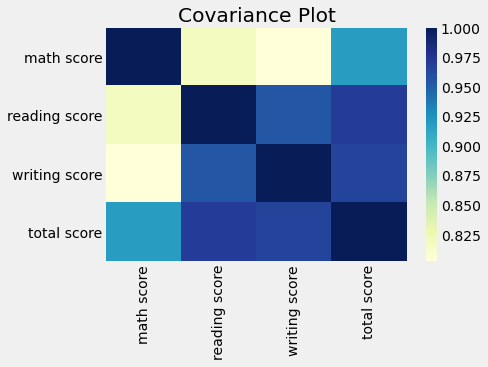

In [7]:
sns.heatmap(df.corr(), cmap="YlGnBu")
plt.title('Covariance Plot')

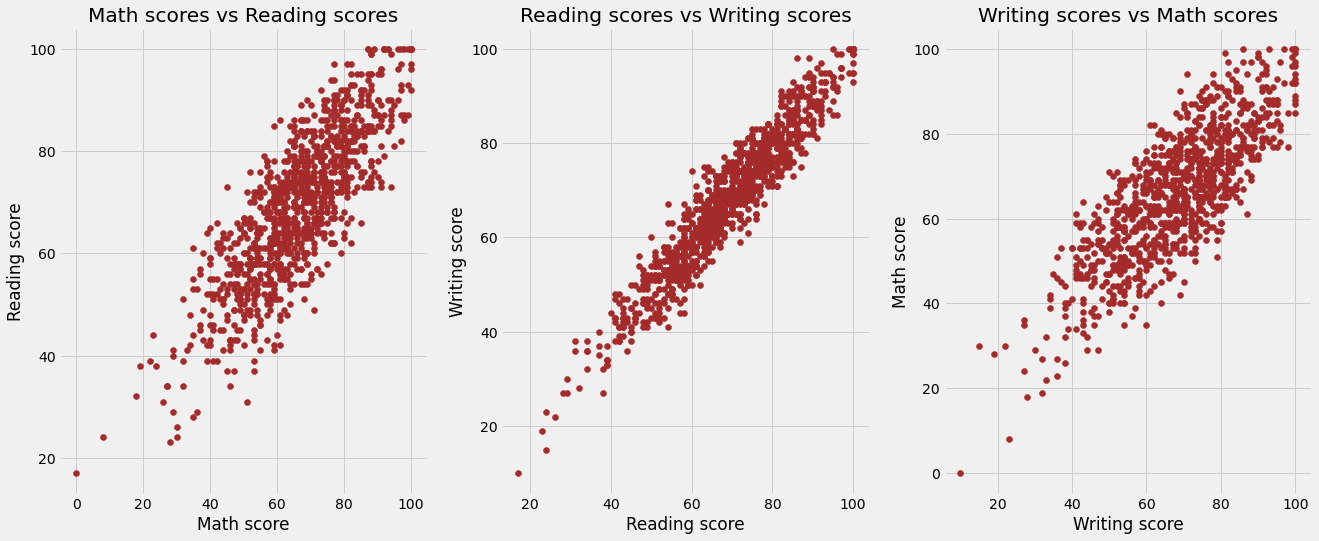

In [8]:
#Scatter plot of scores in different subjects to visualize correlation among them
plt.figure(figsize = (20,8))

plt.subplot(1,3,1)
plt.scatter(df['math score'],df['reading score'],c='brown')
plt.title('Math scores vs Reading scores')
plt.xlabel('Math score')
plt.ylabel('Reading score')

plt.subplot(1,3,2)
plt.scatter(df['reading score'],df['writing score'],c='brown')
plt.title('Reading scores vs Writing scores')
plt.xlabel('Reading score')
plt.ylabel('Writing score')

plt.subplot(1,3,3)
plt.scatter(df['writing score'],df['math score'],c='brown')
plt.title('Writing scores vs Math scores')
plt.xlabel('Writing score')
plt.ylabel('Math score')

plt.show()

The plot shows the same observation as seen from calculating correlation among scores in different subjects. 
Also reading vs writing scatter plot is much more dense than reading vs maths or writing vs maths which shows higher correalation among them - students better in reading(or writing) are better in writing(or reading).


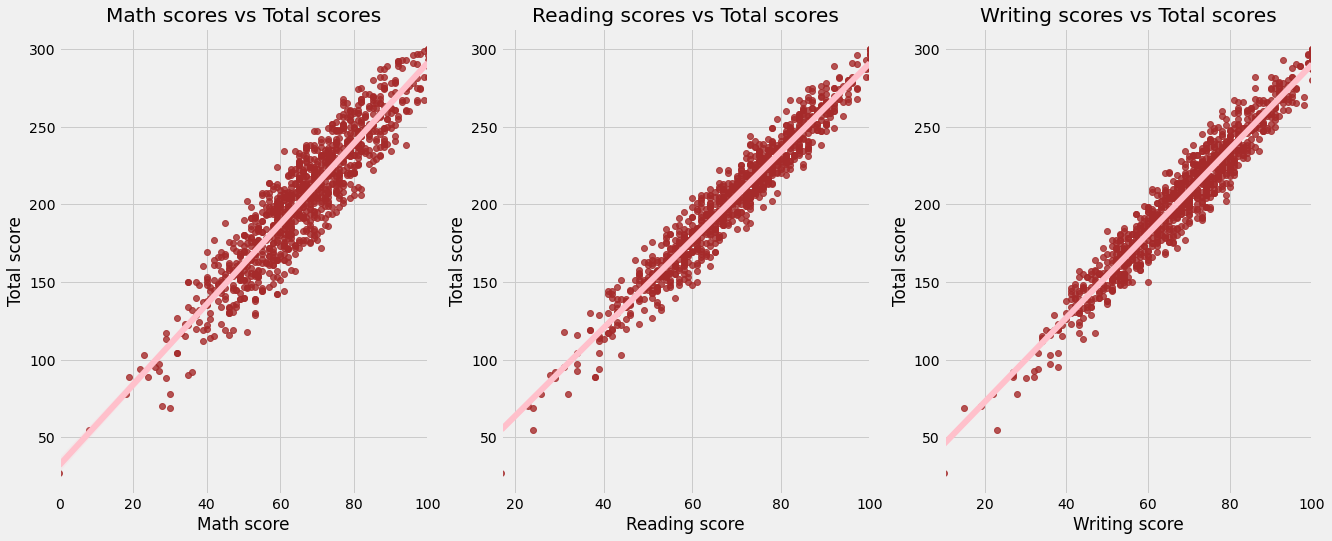

In [9]:
#Scatter plot between individiual subject score and total score with using Seaborn
plt.figure(figsize = (20,8))

plt.subplot(1,3,1)
sns.regplot(x = 'math score', y = 'total score',data = df, scatter_kws={"color": "brown"}, line_kws={"color": "pink"})
plt.title('Math scores vs Total scores')
plt.xlabel('Math score')
plt.ylabel('Total score')

plt.subplot(1,3,2)
sns.regplot(x = 'reading score', y = 'total score',data = df, scatter_kws={"color": "brown"}, line_kws={"color": "pink"})
plt.title('Reading scores vs Total scores')
plt.xlabel('Reading score')
plt.ylabel('Total score')

plt.subplot(1,3,3)
sns.regplot(x = 'writing score', y = 'total score',data = df, scatter_kws={"color": "brown"}, line_kws={"color": "pink"})
plt.title('Writing scores vs Total scores')
plt.xlabel('Writing score')
plt.ylabel('Total score')

plt.show()

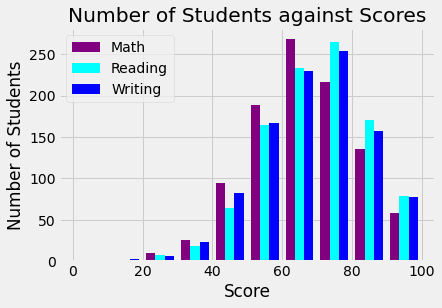

In [10]:
#Number of Students against Scores in all the 3 subjects
#fig = plt.figure()
#ax = fig.add_subplot(projection='3d')

plt.hist([df['math score'],df['reading score'],df['writing score']], color=['purple', 'cyan', 'blue'])
plt.title('Number of Students against Scores')
plt.xlabel('Score')
plt.ylabel('Number of Students')
plt.legend(['Math', 'Reading', 'Writing'])
plt.show()

Number of students with higher score in mathematics have dropped below than reading and writing which may show that is easier to get a higher score in reading and writing than mathematics.

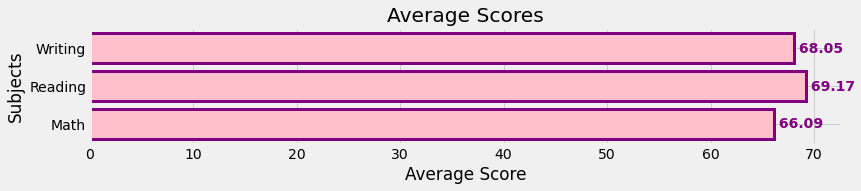

In [11]:
y = ['Math','Reading','Writing']
width = [df['math score'].mean(),df['reading score'].mean(),df['writing score'].mean()]
plt.figure(figsize = (12,2))
plt.barh(y = y, width = width, color='pink',  edgecolor='purple',  linewidth=3)
plt.title('Average Scores')
plt.xlabel('Average Score')
plt.ylabel('Subjects')
for i,v in enumerate(width):
    plt.text(v, i, " "+str(round(v,2)), color='purple', va='center', fontweight='bold')
plt.show()


Average score is highest in reading and lowest in mathematics.

## Analyzing Scores based on Gender


In [12]:
df_gender = df.groupby('gender')
df_gender.first()

,Class,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
gender,,,,,,,,
female,group B,bachelor's degree,standard,none,72,72,74,218
male,group A,associate's degree,free/reduced,none,47,57,44,148


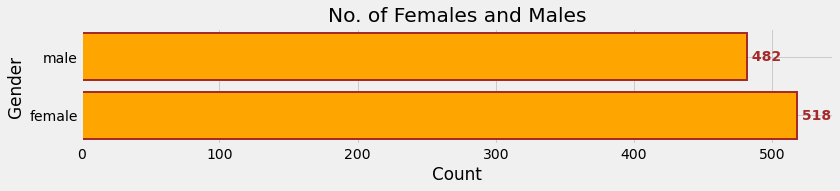

In [13]:
#Number of Females and Males
y = df_gender['gender'].count().keys()
width = df_gender['gender'].count()
plt.figure(figsize = (12,2))
plt.barh(y = y, width = width, color='orange',  edgecolor='brown',  linewidth=2)
plt.title('No. of Females and Males')
plt.xlabel('Count')
plt.ylabel('Gender')
for i,v in enumerate(width):
    plt.text(v, i, " "+str(v), color='brown', va='center', fontweight='bold')
plt.show()

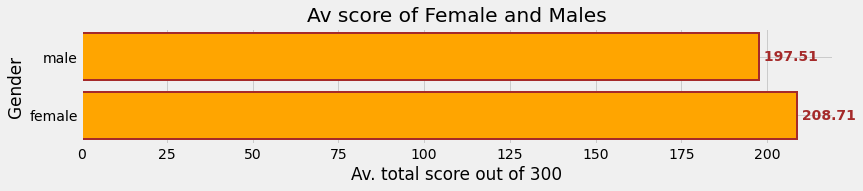

In [14]:
#Average scores of Females and Males
y = df_gender['total score'].mean().keys()
width = df_gender['total score'].mean()
plt.figure(figsize = (12,2))
plt.barh(y = y, width = width, color='orange',  edgecolor='brown',  linewidth=2)
plt.title('Av score of Female and Males')
plt.xlabel('Av. total score out of 300')
plt.ylabel('Gender')
for i,v in enumerate(width):
    plt.text(v, i, " "+str(round(v,2)), color='brown', va='center', fontweight='bold')
plt.show()

Female students have performed better than Male students.

<AxesSubplot:xlabel='gender', ylabel='total score'>

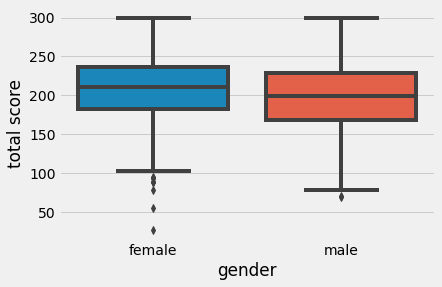

In [15]:
sns.boxplot(x="gender", y="total score", data=df)

C:\Users\PC\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


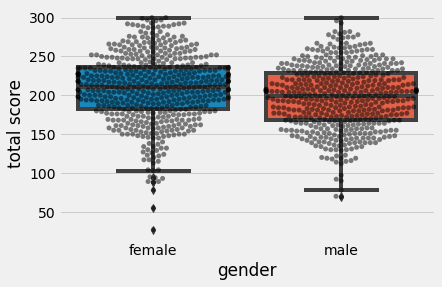

In [16]:
sns.boxplot(x="gender", y="total score", data=df)
sns.swarmplot(x='gender',y='total score', data=df, color='black', alpha=0.5);
#sns.violinplot(x='gender',y='total score',data=df, inner=None,color='lightgray')

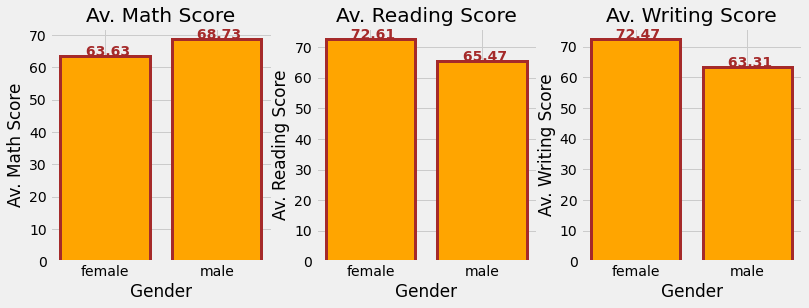

In [17]:
#Average scores in individual subjects
x = df_gender['gender'].count().keys()

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
height = df_gender['math score'].mean()
plt.bar(x = x, height = height, color='orange',  edgecolor='brown',  linewidth=3)
plt.title('Av. Math Score')
plt.xlabel('Gender')
plt.ylabel('Av. Math Score')
for i,v in enumerate(height):
    plt.text(i, v, " "+str(round(v,2)), color='brown', ha='center', fontweight='bold')

plt.subplot(1,3,2)
height = df_gender['reading score'].mean()
plt.bar(x = x, height = height, color='orange',  edgecolor='brown',  linewidth=3)
plt.title('Av. Reading Score')
plt.xlabel('Gender')
plt.ylabel('Av. Reading Score')
for i,v in enumerate(height):
    plt.text(i, v, " "+str(round(v,2)), color='brown', ha='center', fontweight='bold')

plt.subplot(1,3,3)
height = df_gender['writing score'].mean()
plt.bar(x = x, height = height, color='orange',  edgecolor='brown',  linewidth=3)
plt.title('Av. Writing Score')
plt.xlabel('Gender')
plt.ylabel('Av. Writing Score')
for i,v in enumerate(height):
    plt.text(i, v, " "+str(round(v,2)), color='brown', ha = 'center', fontweight='bold')

plt.show()

Male students performed better in mathematics than female students but worse in both reading and writing.

## Analyzing scores based on Class

In [18]:
df_class = df.groupby('Class')

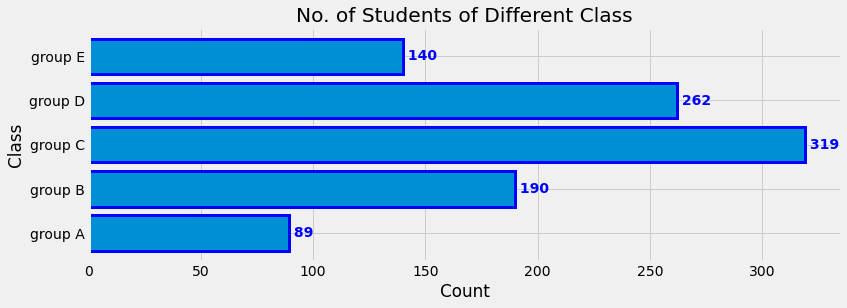

In [19]:
#Count of studensts belonging to different Class
y = df_class['Class'].count().keys()
width = df_class['Class'].count()
plt.figure(figsize = (12,4))
plt.barh(y = y, width = width, edgecolor='blue',  linewidth=3)
plt.title('No. of Students of Different Class')
plt.xlabel('Count')
plt.ylabel('Class')
for i,v in enumerate(width):
    plt.text(v, i, " "+str(v), color='blue', va='center', fontweight='bold')
plt.show()

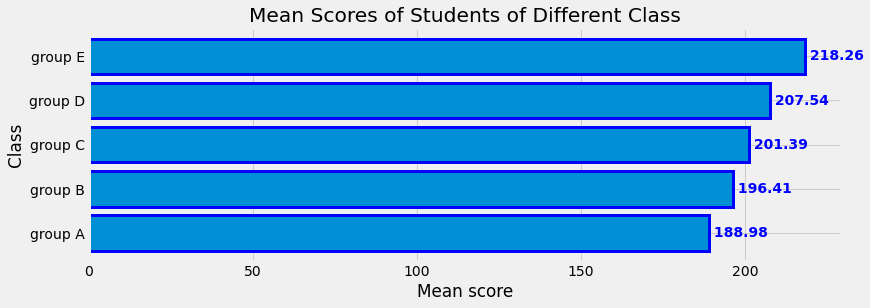

In [20]:
#Average score of students in different Class
y = df_class['total score'].mean().keys()
width = df_class['total score'].mean()
plt.figure(figsize = (12,4))
plt.barh(y = y, width = width, edgecolor='blue',  linewidth=3)
plt.title('Mean Scores of Students of Different Class')
plt.xlabel('Mean score')
plt.ylabel('Class')
for i,v in enumerate(width):
    plt.text(v, i, " "+str(round(v,2)), color='blue', va='center', fontweight='bold')
plt.show()

Students belonging to group E performed the best and students of group A performed the worst.

<AxesSubplot:xlabel='Class', ylabel='total score'>

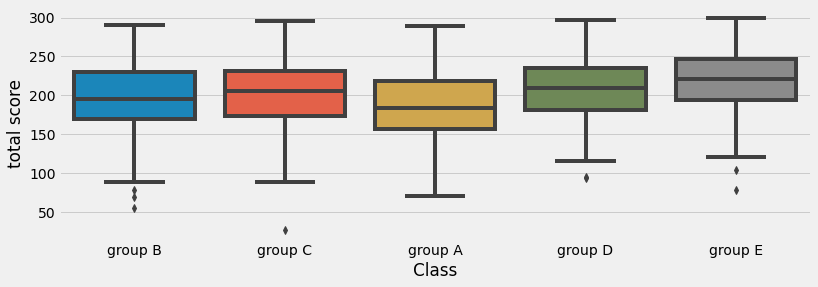

In [21]:
plt.figure(figsize = (12,4))
sns.boxplot(x="Class", y="total score", data=df)

<AxesSubplot:xlabel='Class', ylabel='total score'>

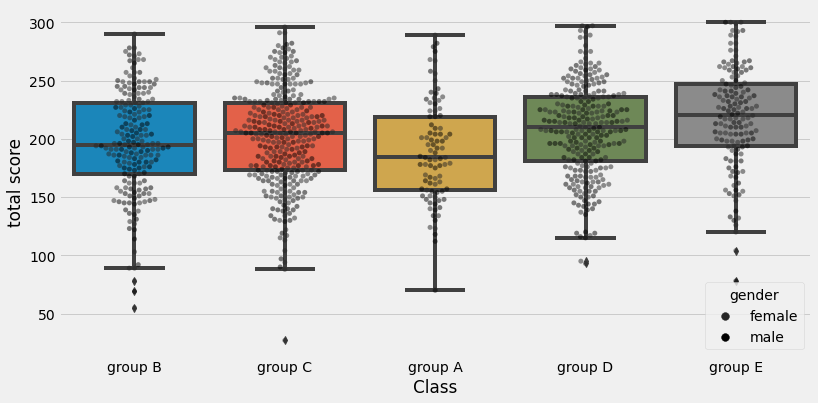

In [22]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Class", y="total score", data=df)
sns.swarmplot(x='Class',y='total score',data=df, hue = 'gender', color='black', alpha=0.5)
#sns.violinplot(x='Class',y='total score',data=df, inner=None,color='lightgray')

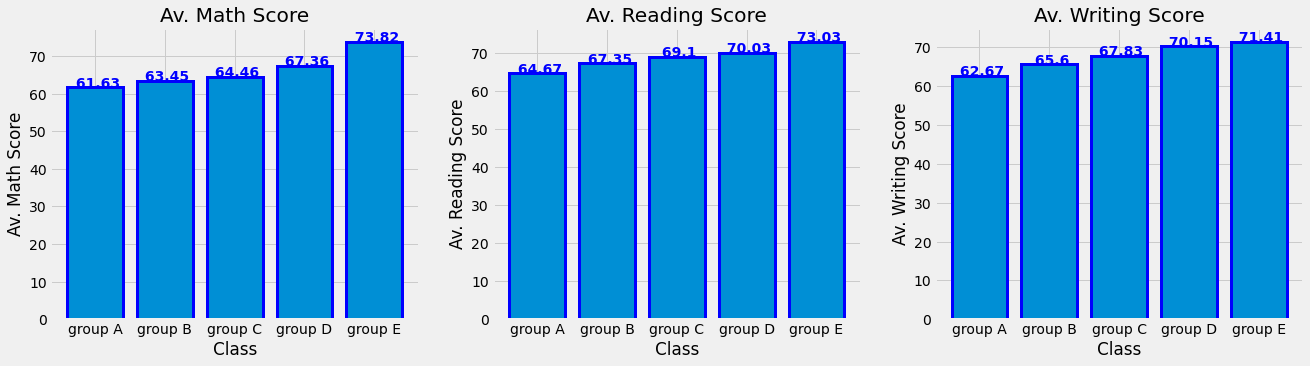

In [23]:
#Average scores in individual subject based on Class
x = df_class['total score'].mean().keys()

plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
height = df_class['math score'].mean()
plt.bar(x = x, height = height, edgecolor='blue',  linewidth=3)
plt.title('Av. Math Score')
plt.xlabel('Class')
plt.ylabel('Av. Math Score')
for i,v in enumerate(height):
    plt.text(i, v, " "+str(round(v,2)), color='blue', ha='center', fontweight='bold')

plt.subplot(1,3,2)
height = df_class['reading score'].mean()
plt.bar(x = x, height = height, edgecolor='blue',  linewidth=3)
plt.title('Av. Reading Score')
plt.xlabel('Class')
plt.ylabel('Av. Reading Score')
for i,v in enumerate(height):
    plt.text(i, v, " "+str(round(v,2)), color='blue', ha='center', fontweight='bold')

plt.subplot(1,3,3)
height = df_class['writing score'].mean()
plt.bar(x = x, height = height, edgecolor='blue',  linewidth=3)
plt.title('Av. Writing Score')
plt.xlabel('Class')
plt.ylabel('Av. Writing Score')
for i,v in enumerate(height):
    plt.text(i, v, " "+str(round(v,2)), color='blue', ha = 'center', fontweight='bold')

plt.show()

Students belonging to group E have performed best in all subjects with students of group A performing the worst.

## Analyzing Scores based on Parental Level of Education

In [24]:
df_parental = df.groupby('parental level of education')

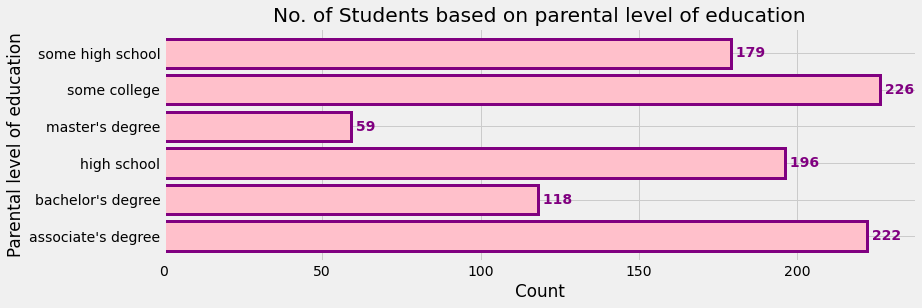

In [25]:
#Counting students based on the parental level of education
y = df_parental['parental level of education'].count().keys()
width = df_parental['parental level of education'].count()
plt.figure(figsize = (12,4))
plt.barh(y = y, width = width, color='pink',  edgecolor='purple',  linewidth=3)
plt.title('No. of Students based on parental level of education')
plt.xlabel('Count')
plt.ylabel('Parental level of education')
for i,v in enumerate(width):
    plt.text(v, i, " "+str(v), color='purple', va='center', fontweight='bold')

plt.show()

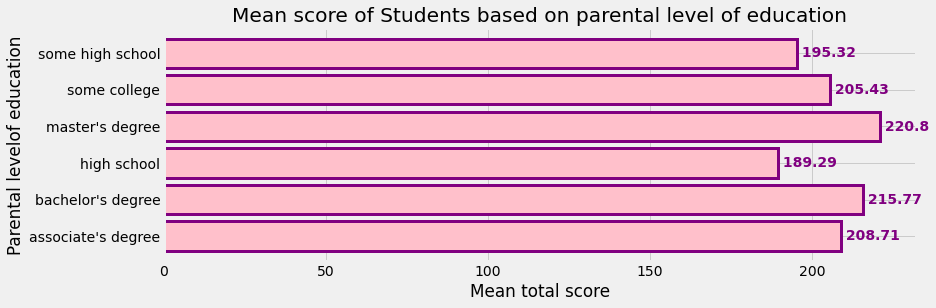

In [26]:
#Mean score of students based on the parental level of education
y = df_parental['total score'].mean().keys()
width = df_parental['total score'].mean()
plt.figure(figsize = (12,4))
plt.barh(y = y, width = width, color='pink',  edgecolor='purple',  linewidth=3)
plt.title('Mean score of Students based on parental level of education')
plt.xlabel('Mean total score')
plt.ylabel('Parental levelof education')
for i,v in enumerate(width):
    plt.text(v, i, " "+str(round(v,2)), color='purple', va='center', fontweight='bold')
plt.show()

This shows that education level of parents effected the students performance.

<AxesSubplot:xlabel='parental level of education', ylabel='total score'>

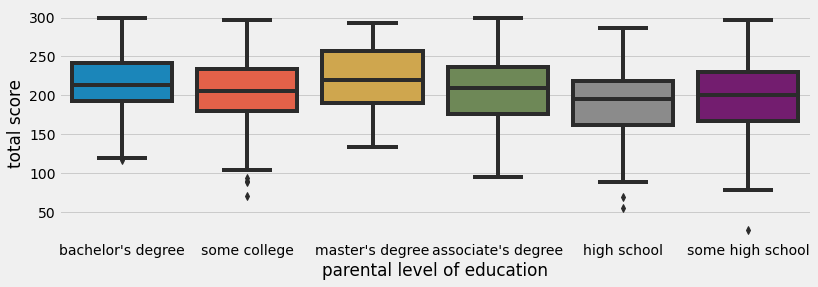

In [27]:
plt.figure(figsize = (12,4))
sns.boxplot(x="parental level of education", y="total score", data=df)

<AxesSubplot:xlabel='parental level of education', ylabel='total score'>

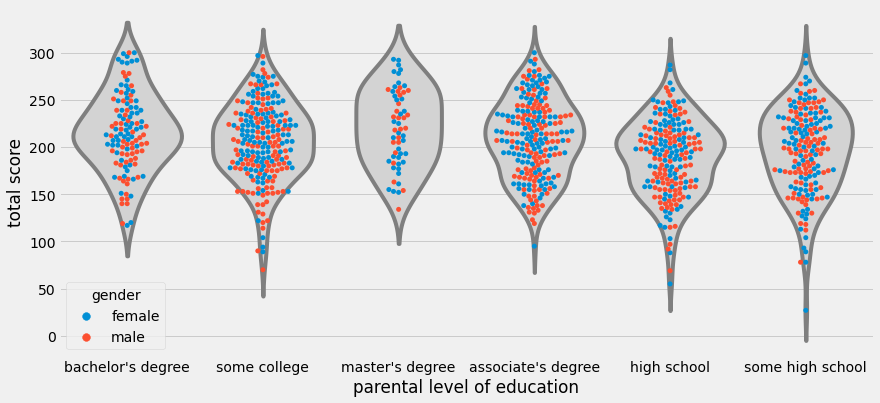

In [28]:
plt.figure(figsize=(13, 6))
sns.swarmplot(x='parental level of education',y='total score',data=df, hue = 'gender')
sns.violinplot(x='parental level of education',y='total score',data=df, inner=None,color='lightgray')

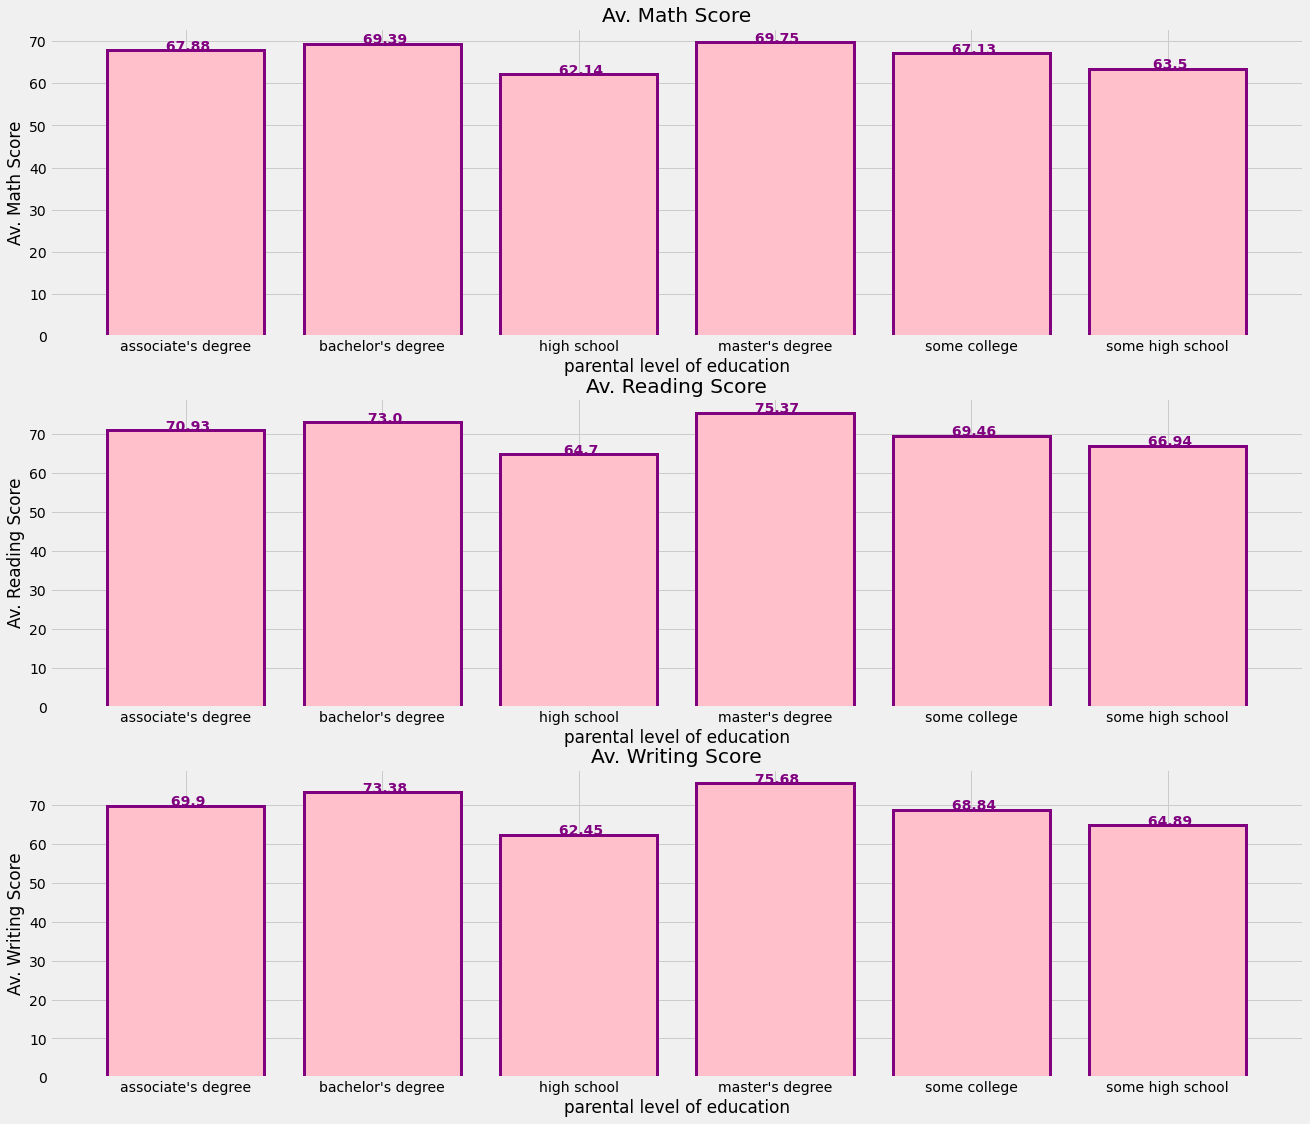

In [29]:
#Mean scores of students in individual subjects based on parental level of education 
x = df_parental['total score'].mean().keys()

plt.figure(figsize=(20,18))

plt.subplot(3,1,1)
height = df_parental['math score'].mean()
plt.bar(x = x, height = height, color='pink',  edgecolor='purple',  linewidth=3)
plt.title('Av. Math Score')
plt.xlabel('parental level of education')
plt.ylabel('Av. Math Score')
for i,v in enumerate(height):
    plt.text(i, v, " "+str(round(v,2)), color='purple', ha='center', fontweight='bold')

plt.subplot(3,1,2)
height = df_parental['reading score'].mean()
plt.bar(x = x, height = height, color='pink',  edgecolor='purple',  linewidth=3)
plt.title('Av. Reading Score')
plt.xlabel('parental level of education')
plt.ylabel('Av. Reading Score')
for i,v in enumerate(height):
    plt.text(i, v, " "+str(round(v,2)), color='purple', ha='center', fontweight='bold')

plt.subplot(3,1,3)
height = df_parental['writing score'].mean()
plt.bar(x = x, height = height, color='pink',  edgecolor='purple',  linewidth=3)
plt.title('Av. Writing Score')
plt.xlabel('parental level of education')
plt.ylabel('Av. Writing Score')
for i,v in enumerate(height):
    plt.text(i, v, " "+str(round(v,2)), color='purple', ha = 'center', fontweight='bold')

plt.show()

## Analyzing students scores based on Test preparation course

In [30]:
df_test = df.groupby('test preparation course')

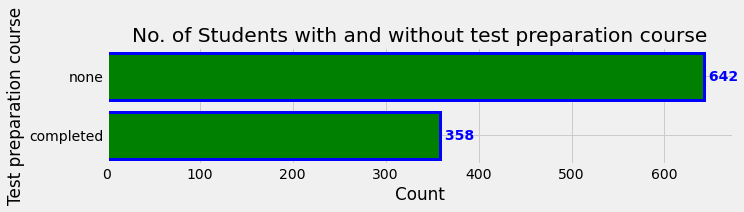

In [31]:
#Count of students based on test preparation course
y = df_test['test preparation course'].count().keys()
width = df_test['test preparation course'].count()
plt.figure(figsize = (10,2))
plt.barh(y = y, width = width, color='green',  edgecolor='blue',  linewidth=3)
plt.title('No. of Students with and without test preparation course')
plt.xlabel('Count')
plt.ylabel('Test preparation course')
for i,v in enumerate(width):
    plt.text(v, i, " "+str(v), color='blue', va='center', fontweight='bold')
plt.show()

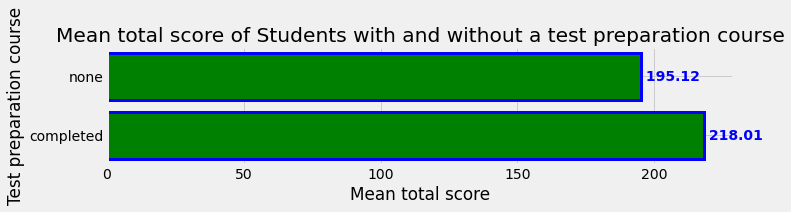

In [32]:
#Mean scores of students based on test preparation course
y = df_test['total score'].mean().keys()
width = df_test['total score'].mean()
plt.figure(figsize = (10,2))
plt.barh(y = y, width = width, color='green',  edgecolor='blue',  linewidth=3)
plt.title('Mean total score of Students with and without a test preparation course')
plt.xlabel('Mean total score')
plt.ylabel('Test preparation course')
for i,v in enumerate(width):
    plt.text(v, i, " "+str(round(v,2)), color='blue', va='center', fontweight='bold')
plt.show()

Students wwho took test preparation course have performed better.

<AxesSubplot:xlabel='test preparation course', ylabel='total score'>

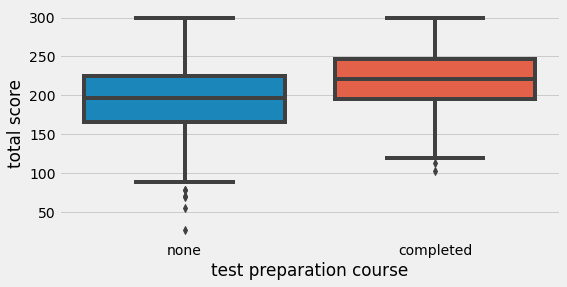

In [33]:
plt.figure(figsize = (8,4))
sns.boxplot(x="test preparation course", y="total score", data=df)

<AxesSubplot:xlabel='test preparation course', ylabel='total score'>

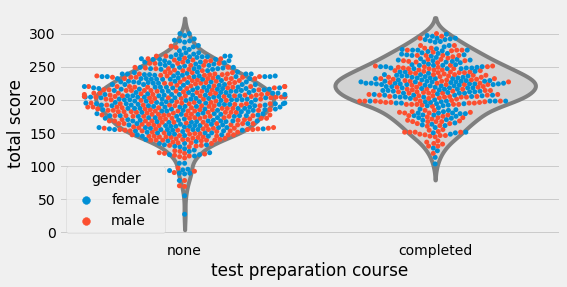

In [34]:
plt.figure(figsize=(8, 4))
sns.swarmplot(x='test preparation course',y='total score',data=df, hue = 'gender')
sns.violinplot(x='test preparation course',y='total score',data=df, inner=None,color='lightgray')

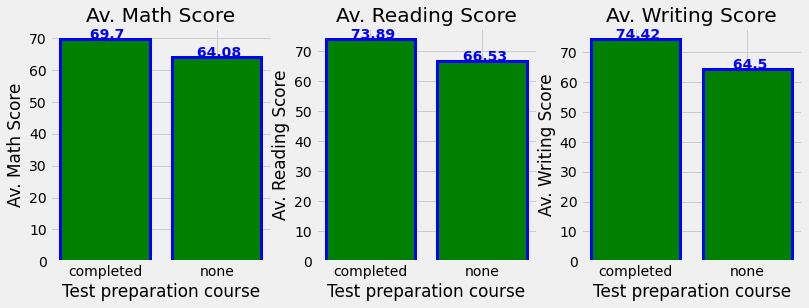

In [35]:
#Individual scores based on test preparation course
x = df_test['total score'].mean().keys()

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
height = df_test['math score'].mean()
plt.bar(x = x, height = height, color='green',  edgecolor='blue',  linewidth=3)
plt.title('Av. Math Score')
plt.xlabel('Test preparation course')
plt.ylabel('Av. Math Score')
for i,v in enumerate(height):
    plt.text(i, v, " "+str(round(v,2)), color='blue', ha='center', fontweight='bold')

plt.subplot(1,3,2)
height = df_test['reading score'].mean()
plt.bar(x = x, height = height, color='green',  edgecolor='blue',  linewidth=3)
plt.title('Av. Reading Score')
plt.xlabel('Test preparation course')
plt.ylabel('Av. Reading Score')
for i,v in enumerate(height):
    plt.text(i, v, " "+str(round(v,2)), color='blue', ha='center', fontweight='bold')

plt.subplot(1,3,3)
height = df_test['writing score'].mean()
plt.bar(x = x, height = height, color='green',  edgecolor='blue',  linewidth=3)
plt.title('Av. Writing Score')
plt.xlabel('Test preparation course')
plt.ylabel('Av. Writing Score')
for i,v in enumerate(height):
    plt.text(i, v, " "+str(round(v,2)), color='blue', ha = 'center', fontweight='bold')

plt.show()

In [36]:
#Toppers
df_topper = df[(df['math score'] >= 90) & (df['reading score'] >= 90) & (df['writing score'] >= 90)]

In [37]:
df_topper['gender'].count()

28

There are 28 students who have scored 90 or above in all the 3 subjects.

In [38]:
df_topper.sort_values('total score',ascending=False).head()

,gender,Class,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
916,male,group E,bachelor's degree,standard,completed,100,100,100,300
458,female,group E,bachelor's degree,standard,none,100,100,100,300
962,female,group E,associate's degree,standard,none,100,100,100,300
114,female,group E,bachelor's degree,standard,completed,99,100,100,299
179,female,group D,some high school,standard,completed,97,100,100,297


In [39]:
#Students who have failed in all three subjects(less than 40 score)
df_fail_all = df[(df['math score'] < 40) & (df['reading score'] < 40) & (df['writing score'] < 40)]
df_fail_all.sort_values('total score',ascending=True).head()

,gender,Class,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
59,female,group C,some high school,free/reduced,none,0,17,10,27
980,female,group B,high school,free/reduced,none,8,24,23,55
596,male,group B,high school,free/reduced,none,30,24,15,69
327,male,group A,some college,free/reduced,none,28,23,19,70
17,female,group B,some high school,free/reduced,none,18,32,28,78


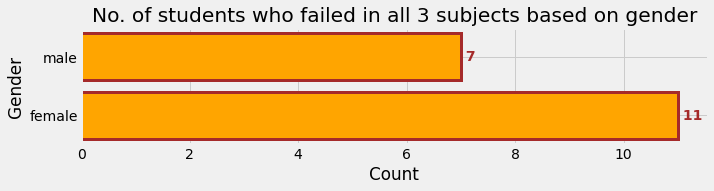

In [40]:
y = df['gender'].unique().tolist()
x = [0]*len(y)
for i in range(len(y)):
    x[i] += df_fail_all[df_fail_all['gender'] == y[i]]['gender'].count()
width = x

plt.figure(figsize = (10,2))
plt.barh(y = y, width = width, color='orange',  edgecolor='brown',  linewidth=3)
plt.title('No. of students who failed in all 3 subjects based on gender')
plt.xlabel('Count')
plt.ylabel('Gender')
for i,v in enumerate(width):
    plt.text(v, i, " "+str(v), color='brown', va='center', fontweight='bold')
plt.show()

Though there are more female students who failed but they are more in number and the difference here is not large so nothing significant here.

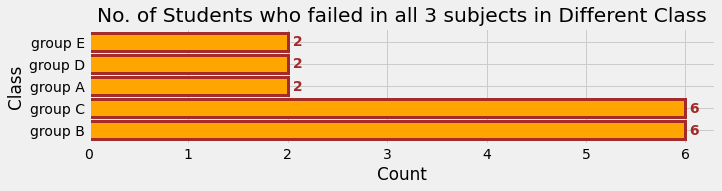

In [41]:
y = df['Class'].unique().tolist()
x = [0]*len(y)
for i in range(len(y)):
    x[i] += df_fail_all[df_fail_all['Class'] == y[i]]['gender'].count()
width = x

plt.figure(figsize = (10,2))
plt.barh(y = y, width = width, color='orange',  edgecolor='brown',  linewidth=3)
plt.title('No. of Students who failed in all 3 subjects in Different Class')
plt.xlabel('Count')
plt.ylabel('Class')
for i,v in enumerate(width):
    plt.text(v, i, " "+str(v), color='brown', va='center', fontweight='bold')
plt.show()

Though group A students have performed the worst as seen earlier there are lesser who failed than students in group B and group C maybe because group A students are lesser in comparison to group B and C. Also same number of group A, D, E students failed in all subjects even though group E students performed the best.

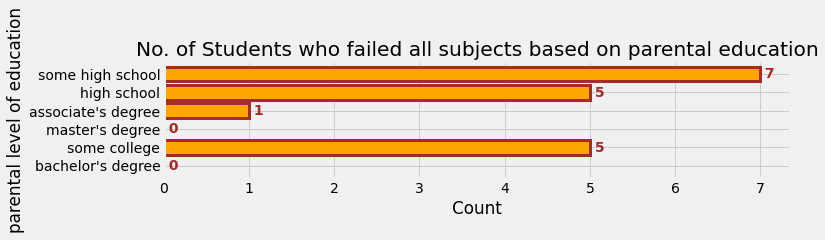

In [42]:
y = df['parental level of education'].unique().tolist()
x = [0]*len(y)
for i in range(len(y)):
    x[i] += df_fail_all[df_fail_all['parental level of education'] == y[i]]['gender'].count()
width = x
plt.figure(figsize = (10,2))
plt.barh(y = y, width = width, color='orange',  edgecolor='brown',  linewidth=3)
plt.title('No. of Students who failed all subjects based on parental education')
plt.xlabel('Count')
plt.ylabel('parental level of education')
for i,v in enumerate(width):
    plt.text(v, i, " "+str(v), color='brown', va='center', fontweight='bold')
plt.show()

None of the students with parent's having masters or bachelors degree failed in all 3 subjects.

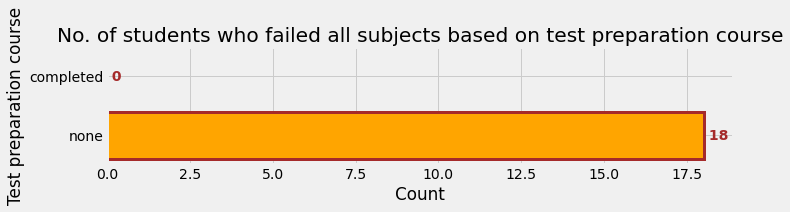

In [43]:
y = df['test preparation course'].unique().tolist()
x = [0]*len(y)
for i in range(len(y)):
    x[i] += df_fail_all[df_fail_all['test preparation course'] == y[i]]['gender'].count()
width = x

plt.figure(figsize = (10,2))
plt.barh(y = y, width = width, color='orange',  edgecolor='brown',  linewidth=3)
plt.title('No. of students who failed all subjects based on test preparation course')
plt.xlabel('Count')
plt.ylabel('Test preparation course')
for i,v in enumerate(width):
    plt.text(v, i, " "+str(v), color='brown', va='center', fontweight='bold')
plt.show()

None of the students who failed in all 3 subjects took a test preparation course.

In [44]:
#Students who failed in atleast 1 subject (less than 40 score in atleast 1 subject)
df_fail = df[(df['math score'] < 40) | (df['reading score'] < 40) | (df['writing score'] < 40)]
df_fail.head()


,gender,Class,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
7,male,group B,some college,free/reduced,none,40,43,39,122
9,female,group B,high school,free/reduced,none,38,60,50,148
17,female,group B,some high school,free/reduced,none,18,32,28,78
33,male,group D,some college,standard,none,40,42,38,120
55,female,group C,high school,free/reduced,none,33,41,43,117


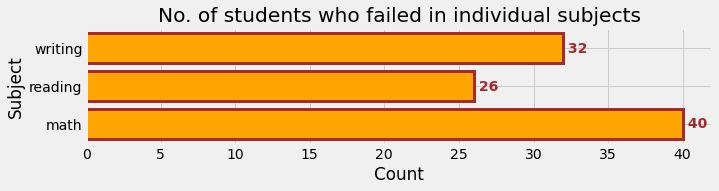

In [45]:
width = [df_fail[df_fail['math score'] < 40]['gender'].count(), df_fail[df_fail['reading score']< 40]['gender'] .count(), 
    df_fail[df_fail['writing score'] < 40]['gender'] .count()]

y = ['math','reading','writing']

plt.figure(figsize = (10,2))
plt.barh(y = y, width = width, color='orange',  edgecolor='brown',  linewidth=3)
plt.title('No. of students who failed in individual subjects')
plt.xlabel('Count')
plt.ylabel('Subject')
for i,v in enumerate(width):
    plt.text(v, i, " "+str(v), color='brown', va='center', fontweight='bold')
plt.show()

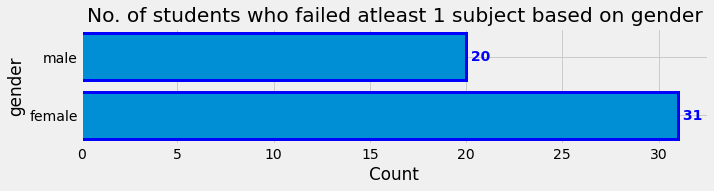

In [46]:
y = df['gender'].unique().tolist()
x = [0]*len(y)
for i in range(len(y)):
    x[i] += df_fail[df_fail['gender'] == y[i]]['gender'].count()
width = x

plt.figure(figsize = (10,2))
plt.barh(y = y, width = width, edgecolor='blue',  linewidth=3)
plt.title('No. of students who failed atleast 1 subject based on gender')
plt.xlabel('Count')
plt.ylabel('gender')
for i,v in enumerate(width):
    plt.text(v, i, " "+str(v), color='blue', va='center', fontweight='bold')
plt.show()

Female students did performed better on an average but more of them failed atleast one subject than male students.

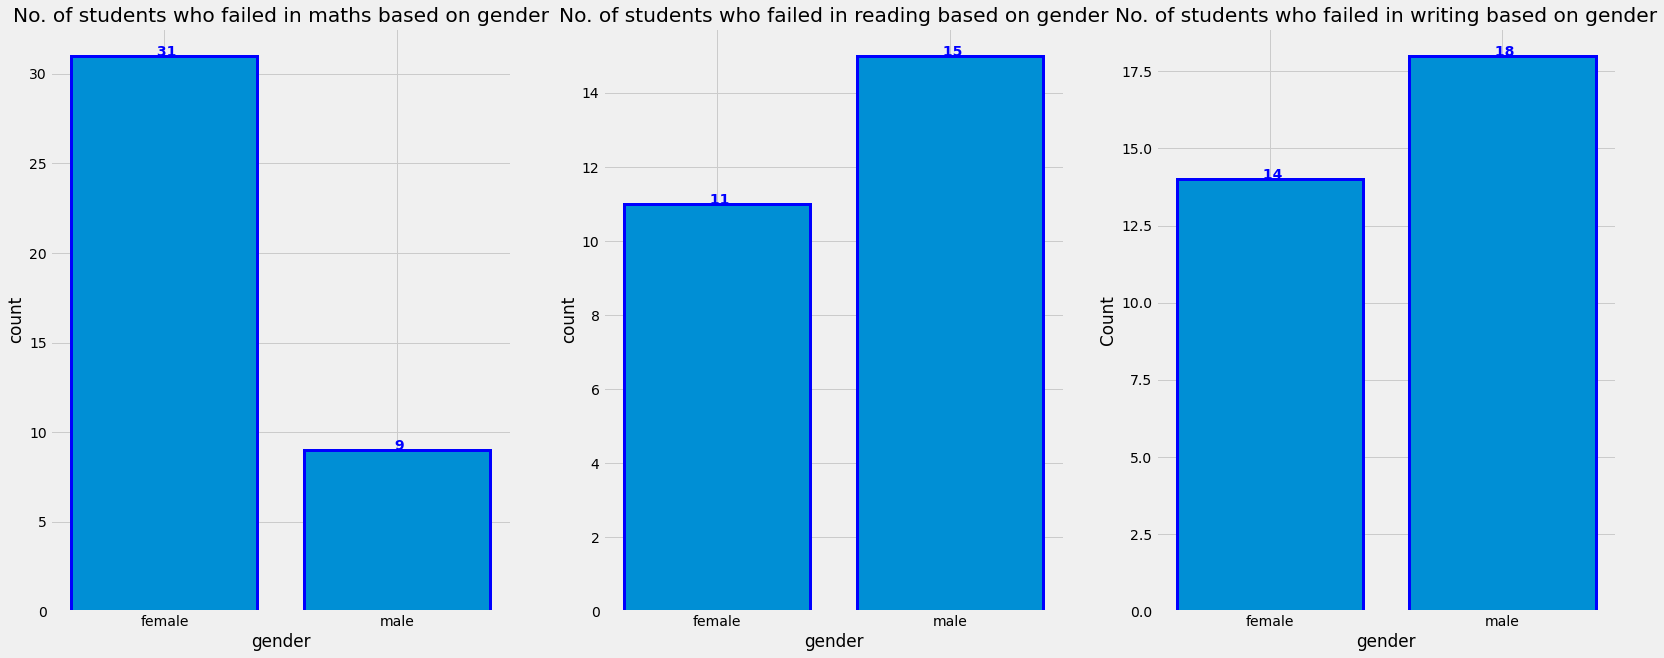

In [47]:
#Number of students who failed in individual subjects based on gender
plt.figure(figsize = (25,10))
x = ['female','male']

plt.subplot(1,3,1)

height = [df_fail[(df_fail['gender']=='female') & (df_fail['math score'] < 40)]['gender'].count(), 
        df_fail[(df_fail['gender']=='male') & (df_fail['math score'] < 40)]['gender'].count()]

plt.bar(x = x, height = height, edgecolor='blue',  linewidth=3)
plt.title('No. of students who failed in maths based on gender')
plt.ylabel('count')
plt.xlabel('gender')
for i,v in enumerate(height):
    plt.text(i, v, " "+str(v), color='blue', ha='center', fontweight='bold')

plt.subplot(1,3,2)
height = [df_fail[(df_fail['gender']=='female') & (df_fail['reading score'] < 40)]['gender'].count(), 
        df_fail[(df_fail['gender']=='male') & (df_fail['reading score'] < 40)]['gender'].count()]

plt.bar(x = x, height = height, edgecolor='blue',  linewidth=3)
plt.title('No. of students who failed in reading based on gender')
plt.ylabel('count')
plt.xlabel('gender')
for i,v in enumerate(height):
    plt.text(i, v, " "+str(v), color='blue', ha='center', fontweight='bold')
    
plt.subplot(1,3,3)
height = [df_fail[(df_fail['gender']=='female') & (df_fail['writing score'] < 40)]['gender'].count(), 
        df_fail[(df_fail['gender']=='male') & (df_fail['writing score'] < 40)]['gender'].count()]

plt.bar(x = x, height = height, edgecolor='blue',  linewidth=3)
plt.title('No. of students who failed in writing based on gender')
plt.ylabel('Count')
plt.xlabel('gender')
for i,v in enumerate(height):
    plt.text(i, v, " "+str(v), color='blue', ha='center', fontweight='bold')
    
plt.show()

Significantly larger number of female students have failed in maths than male students.

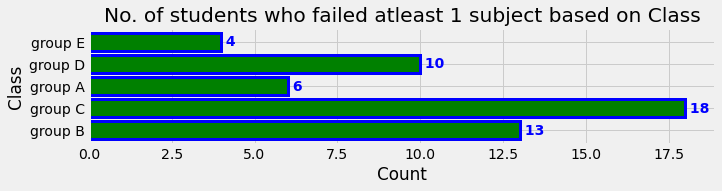

In [48]:
y = df['Class'].unique().tolist()
x = [0]*len(y)
for i in range(len(y)):
    x[i] += df_fail[df_fail['Class'] == y[i]]['gender'].count()
width = x

plt.figure(figsize = (10,2))
plt.barh(y = y, width = width, color='green',  edgecolor='blue',  linewidth=3)
plt.title('No. of students who failed atleast 1 subject based on Class')
plt.xlabel('Count')
plt.ylabel('Class')
for i,v in enumerate(width):
    plt.text(v, i, " "+str(v), color='blue', va='center', fontweight='bold')
plt.show()

Students belonging to group D and E though performed best on average but still a significant amount of them failed in atleast one subject as compared to others.

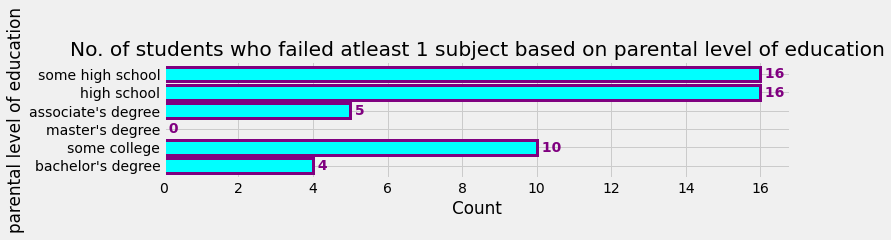

In [49]:
y = df['parental level of education'].unique().tolist()
x = [0]*len(y)
for i in range(len(y)):
    x[i] += df_fail[df_fail['parental level of education'] == y[i]]['gender'].count()
width = x

plt.figure(figsize = (10,2))
plt.barh(y = y, width = width, color='cyan',  edgecolor='purple',  linewidth=3)
plt.title('No. of students who failed atleast 1 subject based on parental level of education')
plt.xlabel('Count')
plt.ylabel('parental level of education')
for i,v in enumerate(width):
    plt.text(v, i, " "+str(v), color='purple', va='center', fontweight='bold')
plt.show()

None of the students failed in any subject whom parents had a master's degree.

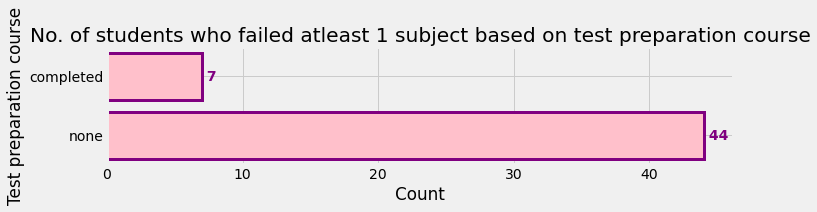

In [50]:
y = df['test preparation course'].unique().tolist()
x = [0]*len(y)
for i in range(len(y)):
    x[i] += df_fail[df_fail['test preparation course'] == y[i]]['gender'].count()
width = x

plt.figure(figsize = (10,2))
plt.barh(y = y, width = width, color='pink',  edgecolor='purple',  linewidth=3)
plt.title('No. of students who failed atleast 1 subject based on test preparation course')
plt.xlabel('Count')
plt.ylabel('Test preparation course')
for i,v in enumerate(width):
    plt.text(v, i, " "+str(v), color='purple', va='center', fontweight='bold')
plt.show()

Most of the students who failed atleast 1 subject didn't took a test preparation course.

## Conclusion

Female students lag behind male students in maths whereas male students in reading and writing.

Higher parental education improves score of students.

Test preparation course has helped students score more.